===========iteration:0===========
SGD:2.4122680728
Momentum:2.32918276891
AdaGrad:2.28239651717
Adam:2.12807305893
===========iteration:100===========
SGD:1.7733114429
Momentum:0.458628175278
AdaGrad:0.263973897051
Adam:0.41744070567
===========iteration:200===========
SGD:0.858972563254
Momentum:0.283308210369
AdaGrad:0.174794159591
Adam:0.27495157938
===========iteration:300===========
SGD:0.543410034978
Momentum:0.226628680686
AdaGrad:0.103840701933
Adam:0.162904399948
===========iteration:400===========
SGD:0.385002722557
Momentum:0.121725004306
AdaGrad:0.0386854192558
Adam:0.0808740623491
===========iteration:500===========
SGD:0.294873140864
Momentum:0.102125200539
AdaGrad:0.0538054902344
Adam:0.0905851171227
===========iteration:600===========
SGD:0.270029849428
Momentum:0.0936873087668
AdaGrad:0.0385181718602
Adam:0.0622234584282
===========iteration:700===========
SGD:0.40189441408
Momentum:0.123146328077
AdaGrad:0.0604739696084
Adam:0.0524311513978
===========iteration:800===

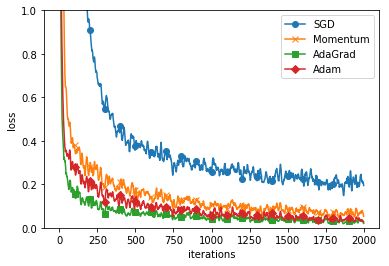

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

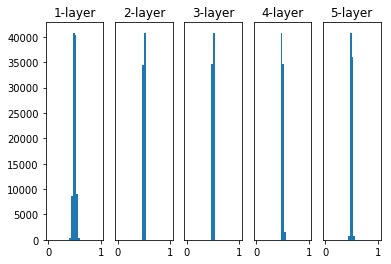

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)

    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.30249723984
Xavier:2.31355084178
He:2.3489093684
===========iteration:100===========
std=0.01:2.30116899471
Xavier:2.23498822187
He:1.63973141429
===========iteration:200===========
std=0.01:2.30197929193
Xavier:2.10671784723
He:0.868615560191
===========iteration:300===========
std=0.01:2.3024214858
Xavier:1.77986401581
He:0.560868756352
===========iteration:400===========
std=0.01:2.30048652371
Xavier:1.18394837325
He:0.498665027953
===========iteration:500===========
std=0.01:2.29954388998
Xavier:0.815861127934
He:0.387050769738
===========iteration:600===========
std=0.01:2.30125256163
Xavier:0.54976556155
He:0.311168057888
===========iteration:700===========
std=0.01:2.30347940167
Xavier:0.612579980918
He:0.430752325793
===========iteration:800===========
std=0.01:2.30013079905
Xavier:0.608011776012
He:0.412813782532
===========iteration:900===========
std=0.01:2.30461752101
Xavier:0.437425294055
He:0.281495660975
===========iteration:1

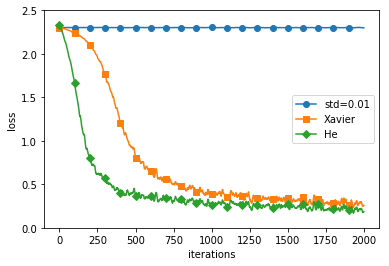

In [12]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()